<a href="https://colab.research.google.com/github/sonicmortis/Portfolio/blob/main/Insurance/Insurance_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1**. Data Exploration

## a. Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


## b. Load Dataset

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/sonicmortis/Portfolio/refs/heads/main/Dataset/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


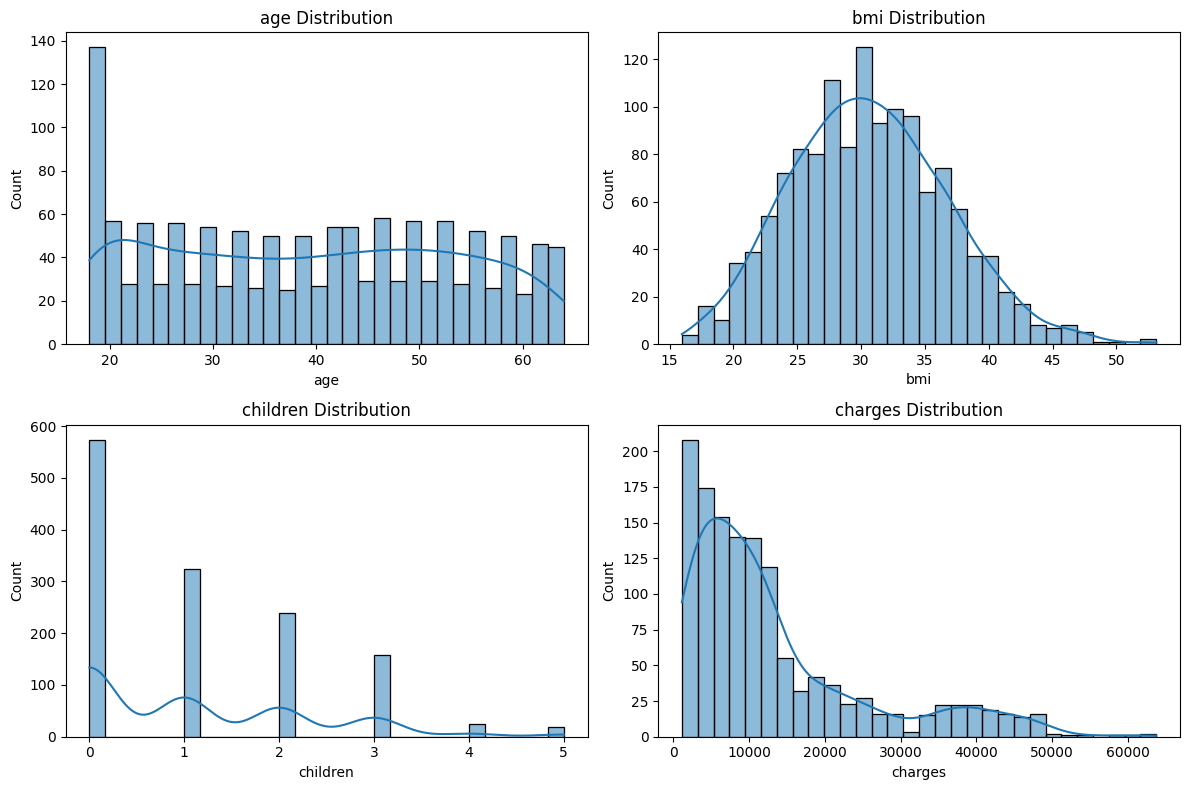

In [7]:
numerical_features = ["age", "bmi", "children", "charges"]

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f"{feature} Distribution")

plt.tight_layout()
plt.show()

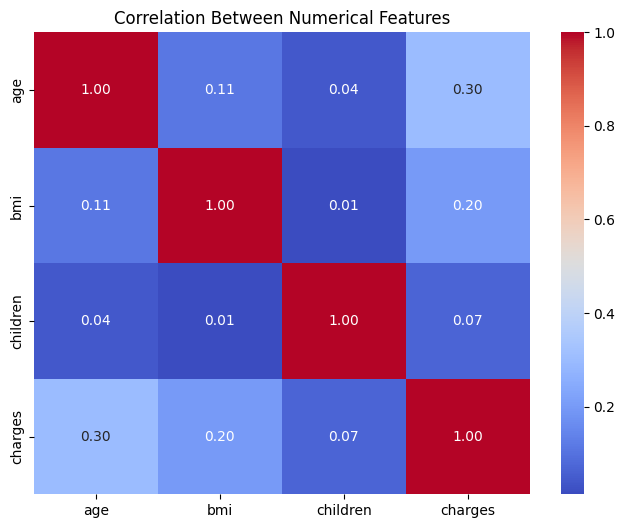

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Numerical Features")
plt.show()

In [9]:
fig = px.histogram(df, x='bmi',
                   title='Histogram of BMI Distribution')

fig.show()

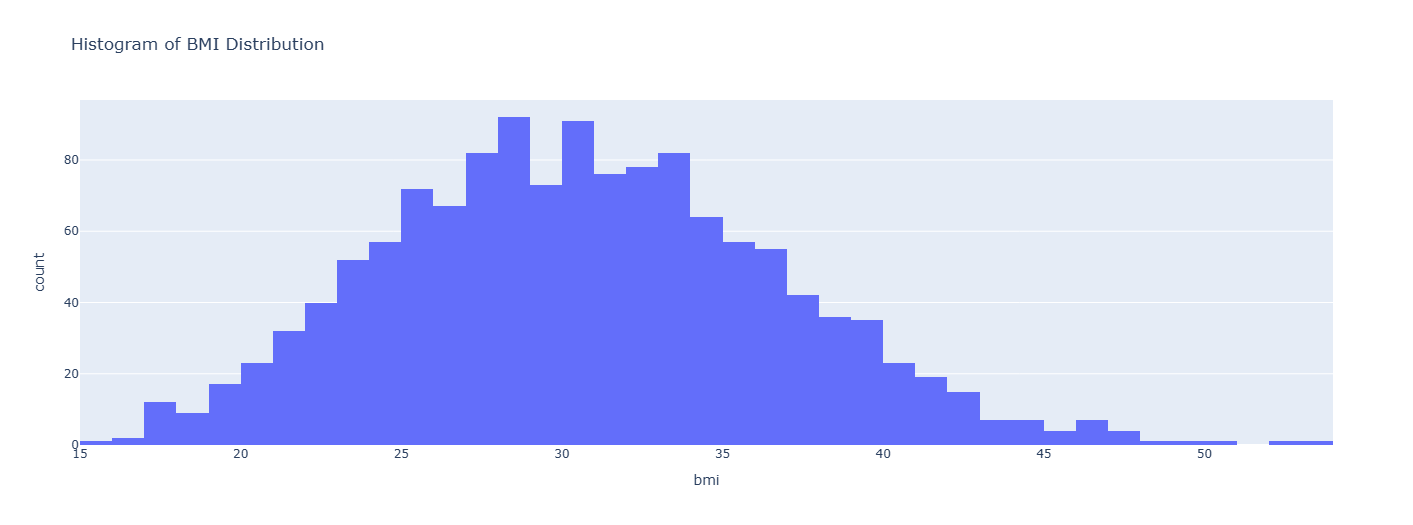

In [16]:
fig = px.scatter(df, x='age', y='charges', animation_frame='children', title='Ages vs Insurance Charges (Animation Based on Number of Children)')
fig.show()

In [11]:
fig = px.scatter_matrix(df, dimensions=['age', 'bmi', 'children', 'charges'], title='Scatter Matrix')
fig.show()

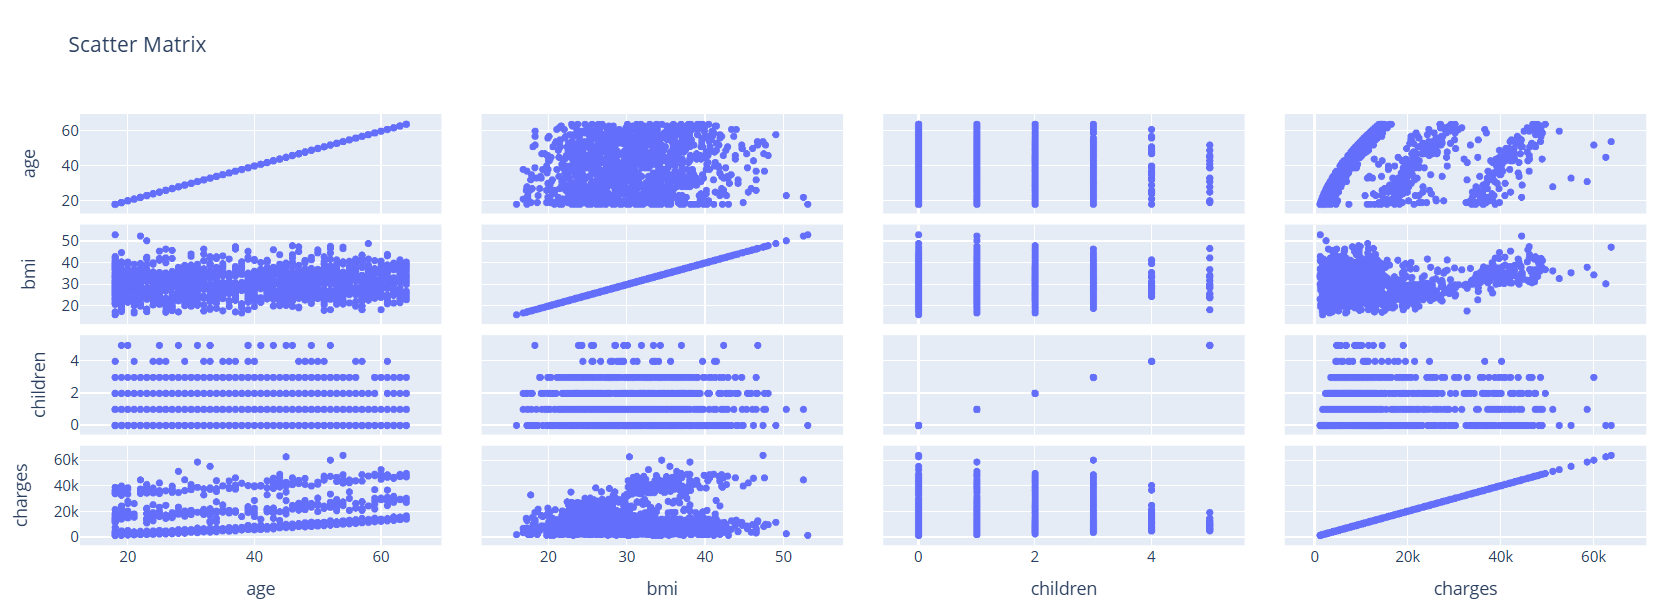

In [18]:
fig = px.scatter(
    df,
    x='age',
    y='charges',
    color='smoker',
    size='bmi',
    hover_data=['region'],
    title='Age vs Insurance Charges',
    labels={'age': 'Age', 'charges': 'Insurance Charges'},
    template='plotly_white'
)

# Customize layout
fig.update_layout(
    title_font_size=20,
    xaxis_title='Age',
    yaxis_title='Insurance Charges',
    font=dict(family='Arial', size=12, color='black')
)

# Customize traces
fig.update_traces(
    marker=dict(size=10, line=dict(width=2, color='black'))
)
fig.show()

In [19]:
fig = px.scatter(
    df,
    x='age',
    y='charges',
    color='smoker',  # Categorical column
    color_discrete_map={'yes': 'red', 'no': 'blue'},  # Custom colors
    size='bmi',  # Marker size based on BMI
    opacity=0.7,  # Transparency
    title='Insurance Charges by Age and Smoking Status',
    labels={'age': 'Age', 'charges': 'Insurance Charges'},
    template='plotly_white'
)

# Customize layout
fig.update_layout(
    title_font_size=20,
    xaxis_title='Age',
    yaxis_title='Insurance Charges',
    font=dict(family='Arial', size=12, color='black')
)
fig.show()

In [20]:
fig = px.box(df, x='sex', y='charges',
             title='Box Plot of Insurance Charges by Gender',
             color='sex',
             category_orders={"sex": ["male", "female"]},
             color_discrete_sequence=['#4169E1', 'purple'],
             )

# Display the plot
fig.show()

In [21]:
from sklearn.preprocessing import LabelEncoder

class InsuranceAnalysis:
    def __init__(self, data):
        self.data = data
        self.findings = {}  # Dictionary to store findings

    # Method 1: Age Distribution
    def plot_age_distribution(self):
        fig = px.histogram(self.data, x='age', nbins=30, title='Age Distribution')
        self.findings['age_distribution'] = fig
        fig.show()

    # Method 3: Insurance Charges Distribution
    def plot_charges_distribution(self):
        fig = px.histogram(self.data, x='charges', nbins=30, title='Insurance Charges Distribution')
        self.findings['charges_distribution'] = fig
        fig.show()

    # Method 4: Comparison of Insurance Charges by Region
    def plot_charges_by_region(self):
        fig = px.box(self.data, x='region', y='charges', title='Insurance Charges by Region')
        self.findings['charges_by_region'] = fig
        fig.show()

    # Method 5: Relationship between BMI and Insurance Charges
    def plot_bmi_vs_charges(self):
        fig = px.scatter(self.data, x='bmi', y='charges', color='smoker', title='BMI vs Insurance Charges')
        self.findings['bmi_vs_charges'] = fig
        fig.show()

    # Method 6: Analysis of Numerical Feature Correlation
    def analyze_correlation(self):
        # Encode categorical columns for correlation analysis
        encoded_data = self.data.copy()
        le = LabelEncoder()
        encoded_data['sex'] = le.fit_transform(encoded_data['sex'])
        encoded_data['smoker'] = le.fit_transform(encoded_data['smoker'])
        encoded_data['region'] = le.fit_transform(encoded_data['region'])

        # Calculate correlation matrix
        correlation_matrix = encoded_data.corr()
        fig = px.imshow(correlation_matrix, text_auto=True, title='Correlation Matrix')
        self.findings['correlation_matrix'] = fig
        fig.show()

        # Identify most influential features
        most_influential = correlation_matrix['charges'].sort_values(ascending=False)
        self.findings['most_influential_features'] = most_influential
        print("Most Influential Features on Insurance Charges:")
        print(most_influential)

    # Method 7: Explore Bias in Data
    def explore_bias(self):
        # Bias based on Gender
        bias_sex = self.data.groupby('sex')['charges'].mean()
        self.findings['bias_sex'] = bias_sex
        print("Average Insurance Charges by Gender:")
        print(bias_sex)

        # Bias based on Region
        bias_region = self.data.groupby('region')['charges'].mean()
        self.findings['bias_region'] = bias_region
        print("\nAverage Insurance Charges by Region:")
        print(bias_region)

        # Visualize Bias
        fig = px.box(self.data, x='sex', y='charges', color='region', title='Insurance Charges by Gender and Region')
        self.findings['bias_visualization'] = fig
        fig.show()

# Create an object of the class
analysis = InsuranceAnalysis(df)

# Execute methods
analysis.plot_age_distribution()
analysis.plot_charges_distribution()
analysis.plot_charges_by_region()
analysis.plot_bmi_vs_charges()
analysis.analyze_correlation()
analysis.explore_bias()

# Save findings to dictionary
findings = analysis.findings

Most Influential Features on Insurance Charges:
charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64
Average Insurance Charges by Gender:
sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

Average Insurance Charges by Region:
region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64
